In [2]:
import pandas as pd
location_data = r'datasets/countries_of_the_world.csv'
data = pd.read_csv(location_data)

In [ ]:
data.dtypes
#good to check if you want to avoid headaches later

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [ ]:
# goal: how many countries are there in each region?
reg_count = data.groupby(['Region'])['Country'].count()
reg_count.sort_values(ascending = False)

Region
SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
WESTERN EUROPE                         28
ASIA (EX. NEAR EAST)                   28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Country, dtype: int64

In [ ]:
# Goal: to see which region is the richest based on individual wealth
data_gdp = round(data.groupby(['Region'])['GDP ($ per capita)'].mean(), 2)

In [ ]:
data_gdp.sort_values(ascending = False)
# conclusion: Western Europe the richest, sub-saharan african the poorest. 
# Notice Western europe is top place with 28 countries
# whereas N.America is 2nd with only 5 countries and baltics half the less at 3 countries

Region
WESTERN EUROPE                         27046.43
NORTHERN AMERICA                       26100.00
BALTICS                                11300.00
NEAR EAST                              10456.25
EASTERN EUROPE                          9808.33
LATIN AMER. & CARIB                     8682.22
OCEANIA                                 8247.62
ASIA (EX. NEAR EAST)                    8053.57
NORTHERN AFRICA                         5460.00
C.W. OF IND. STATES                     4000.00
SUB-SAHARAN AFRICA                      2323.53
Name: GDP ($ per capita), dtype: float64

In [ ]:
# goal: to explore relationship between literacy-wealth (also, pop-wealth?)
# lets first check the average literacy rate and gdp of world
overall_lit = round(data['Literacy (%)'].mean(), 2)
overall_gdp = round(data['GDP ($ per capita)'].mean(), 1)
print ("Mean literacy % worldwide: " + str(overall_lit))
print ("Mean GDP in $ worldwide: " + str(overall_gdp))

Mean literacy % worldwide: 82.84
Mean GDP in $ worldwide: 9689.8


In [ ]:
data1 = data[['Country', 'Region', 'Literacy (%)', 'GDP ($ per capita)']]
data1.head()
# now we have a new dataframe to work with this separate study

,Country,Region,Literacy (%),GDP ($ per capita)
0,Afghanistan,ASIA (EX. NEAR EAST),36.0,700.0
1,Albania,EASTERN EUROPE,86.5,4500.0
2,Algeria,NORTHERN AFRICA,70.0,6000.0
3,American Samoa,OCEANIA,97.0,8000.0
4,Andorra,WESTERN EUROPE,100.0,19000.0


In [ ]:
# lets check the statistical properties of literacy column
data1['Literacy (%)'].describe()
# min = 17.6 % ----> awesome to know!

count    209.000000
mean      82.838278
std       19.722173
min       17.600000
25%       70.600000
50%       92.500000
75%       98.000000
max      100.000000
Name: Literacy (%), dtype: float64

In [ ]:
lit_vals = []
GDP_vals = []
for i in range(20)[3:]:
    i = i * 5     
    high_lit = data1[data1['Literacy (%)'] >= float(i)] 
    gdp_high_lit = round(high_lit['GDP ($ per capita)'].mean(), 2)
    lit_vals.append(i)
    GDP_vals.append(gdp_high_lit)

# 1)use a for loop to find mean GDP values of countries where literacy = i where i is 5 values
# incrementalseach time until literacy % reach 100. Thus the range for loop = 20 since 100/5 = 20
# 2)because we know that the lowest literacy % = 17.6, we skip the first 3 loops to reach i = 15
# thus we did: range(20)[3:] which says that start from 4th loop and end as normal
# 3)now we filter the data1 in 2nd line of for loop
# 4)after this, we find the average value of the GDP from the new dataset where only countries 
# with literacy % > i is included
# 5)finally, we append literacy % and GDP values to separate lists. Then we use that as values for dict
# keys to create a dataframe

In [ ]:
lit_gdp_relation = pd.DataFrame({'Literacy %': lit_vals, 'GDP in USD': GDP_vals})
lit_gdp_relation

,Literacy %,GDP in USD
0,15,9611.00
1,20,9653.37
2,25,9653.37
3,30,9694.69
4,35,9739.32
5,40,9867.00
6,45,10304.15
7,50,10542.02
8,55,10921.11
9,60,11261.27


In [ ]:
lit_gdp_graph = lit_gdp_relation.pivot_table(index = 'Literacy %')
lit_gdp_graph.head(2)
# we need to index the literacy % column so that it is in the x-axis, then we can graph it

,GDP in USD
Literacy %,
15,9611.00
20,9653.37


In [ ]:
lit_gdp_graph.plot(title = 'Mean GDP per capita of countries that have equal or higher literacy %')
# conclusion: there we have it, the relationship between GDP and literacy % in all its glory
# interesting thing to note here is that from approx. 85-95% literacy rate has the highest increase in GDP

In [ ]:
# goal: find relationship between literacy % and phone possession
lit_vals = []
mean_phone = []
for i in range(20)[3:]:
    i = i * 5     
    lit = data[data['Literacy (%)'] >= float(i)] 
    phone = round(lit['Phones (per 1000)'].mean(), 2)
    lit_vals.append(i)
    mean_phone.append(phone)

In [ ]:
lit_phone_relation = pd.DataFrame({'Literacy %': lit_vals, 'Mean phone possession per 1000': mean_phone})

In [ ]:
lit_phone_graph = lit_phone_relation.pivot_table(index = 'Literacy %')

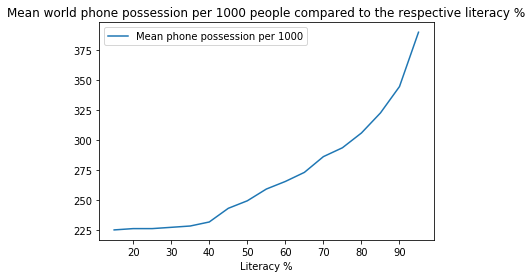

In [ ]:
lit_phone_graph.plot(title = 'Mean world phone possession per 1000 people compared to the respective literacy %')
# the graph is very similar to the previous GDP/literacy graph. We can discern from this that:
# 1) GDP and phone possession is directly propotional
# 2) but this does not indicate causation, simply an effect that could be explained through relationship 
#    they both have: literacy %
# 3) one theory would be that since phone are quite an expensive item to possess, higher GDP means
#    people in those countries are able to afford them hence their directly proportional relationship

In [ ]:
# find relationship between service, industry and farm sector % of a country and its GDP per capita
data[['Service', 'Industry', 'Agriculture']].describe()
# good to check so we can make a proper dataframe later

,Service,Industry,Agriculture
count,212.000000,211.000000,212.000000
mean,0.565283,0.282711,0.150844
std,0.165841,0.138272,0.146798
min,0.062000,0.020000,0.000000
25%,0.429250,0.193000,0.037750
50%,0.571000,0.272000,0.099000
75%,0.678500,0.341000,0.221000
max,0.954000,0.906000,0.769000


In [ ]:
sector_percent = []
agri_gdp = []
ind_gdp = []
service_gdp = []

for i in range(101)[1:]:
    
    i = i/100   
    
    service = data[data['Service'] >= float(i)] 
    industry = data[data['Industry'] >= float(i)]
    agriculture = data[data['Agriculture'] >= float(i)]
    
    ser_gdp = round(service['GDP ($ per capita)'].mean(), 2)
    industry_gdp = round(industry['GDP ($ per capita)'].mean(), 2)
    agriculture_gdp = round(agriculture['GDP ($ per capita)'].mean(), 2)
    
    sector_percent.append(i)
    agri_gdp.append(agriculture_gdp)
    ind_gdp.append(industry_gdp)
    service_gdp.append(ser_gdp)

In [ ]:
gdp_service_relation = pd.DataFrame({'Sector %': sector_percent ,'Agriculture world mean GDP': agri_gdp, 'Industry world mean GDP': ind_gdp, 'Service world mean GDP': service_gdp})

In [ ]:
gdp_service_graph = gdp_service_relation.pivot_table(index = 'Sector %')

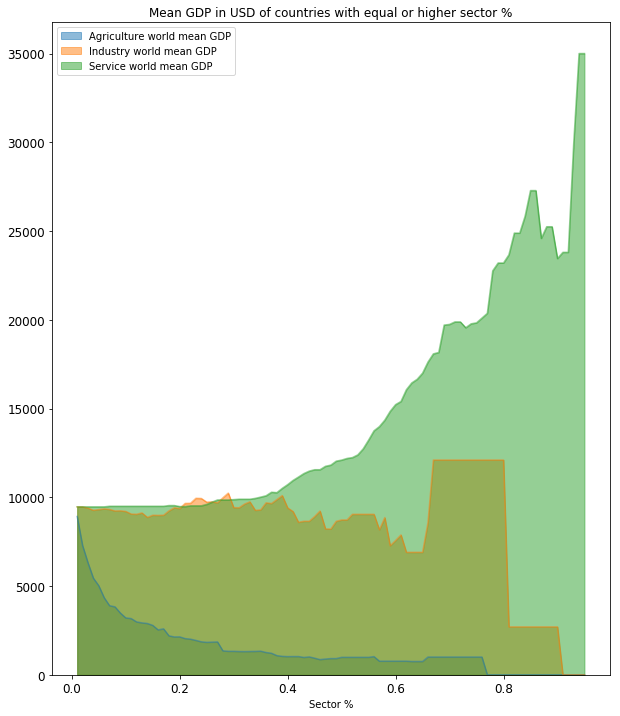

In [ ]:
gdp_service_graph.plot(kind = 'area', stacked = False, figsize = [10,12], fontsize = 12, title = 'Mean GDP in USD of countries with equal or higher sector %')

# Ignoring the outliers, it seems that countries which are more service based have the highest GDP per capita, while mainly agricultural countries have the lowest
# This makes obvious sense, since countries that have industrialized would be more richer and service based than their non industrialized counterparts
# However, it is interesting to see how much the world values service than agriculture which the entire world is so dependant on